In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from dcase_evaluator_analysis import DCASEEvaluatorAnalysis
from models.audiosep import AudioSep
from models.one_peace_encoder import ONE_PEACE_Encoder

import argparse
import os
from utils import parse_yaml, load_ss_model
import pandas as pd
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import librosa
import numpy as np


def eval(evaluator,
         encoder_checkpoint_path = None, 
         ssnet_checkpoint_path = None, 
         config_yaml=None, 
         device = "cuda"):
    
    configs = parse_yaml(config_yaml)
    
    # ONE_PEACE modelhub expects some paths to be relative to this dir
    os.chdir('ONE-PEACE/')
    # TODO:path in shared scratch dir for now..., move to class project dir whenever we get that
    query_encoder = ONE_PEACE_Encoder(pretrained_path=encoder_checkpoint_path)
    os.chdir('..')

    # put ONE-PEACE model in eval model (probably unecessary)
    query_encoder.model.model.eval()

    pl_model = load_ss_model(
        configs=configs,
        checkpoint_path=ssnet_checkpoint_path,
        query_encoder=query_encoder
    ).to(device)


    print(f'-------  Start Evaluation  -------')

    # evaluation 
    return evaluator(pl_model)
    msg_clotho = "SDR: {:.3f}, SDRi: {:.3f}, SISDR: {:.3f}".format(SDR, SDRi, SISDR)
    print(msg_clotho)

    print('-------------------------  Done  ---------------------------')



/fs/nexus-scratch/vla/micromamba/envs/LASS/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/fs/nexus-scratch/vla/micromamba/envs/LASS/lib/python3.9/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/nfshomes/vla/lass-final-project/models/CLAP/open_clip/factory.py:55: FutureWarning: You a

In [3]:

parser = argparse.ArgumentParser()
parser.add_argument(
    "--config_yaml",
    type=str,
    required=True,
    help="Path of config file for AudioSep model",
)

parser.add_argument(
    "--encoder_checkpoint_path",
    type=str,
    required=True,
    help="Path of pretrained checkpoint for QueryEncoder (ONE-PEACE)",
)

parser.add_argument(
    '--ssnet_checkpoint_path',
    type=str,
    required=True,
    help = "Path of pretrained checkpoint for Seperation Network (ResUNet)"
)

cli = '--config_yaml config/audiosep_onepeace.yaml --encoder_checkpoint_path /fs/nexus-scratch/vla/finetune_al_retrieval.pt  --ssnet_checkpoint_path /fs/nexus-scratch/vla/checkpoints/train/audiosep_onepeace,devices=1/step=140000.ckpt'

args = parser.parse_args(cli.split())
args



Namespace(config_yaml='config/audiosep_onepeace.yaml', encoder_checkpoint_path='/fs/nexus-scratch/vla/finetune_al_retrieval.pt', ssnet_checkpoint_path='/fs/nexus-scratch/vla/checkpoints/train/audiosep_onepeace,devices=1/step=140000.ckpt')

In [ ]:
# Run evaluation on validation set + pull out per-sample metrics and similarity scores
# dcase_evaluator = DCASEEvaluatorAnalysis(
#     sampling_rate=16000,
#     eval_indexes='lass_synthetic_validation.csv',
#     audio_dir='lass_validation',
# )

# df_results = eval(dcase_evaluator,
#                   encoder_checkpoint_path = args.encoder_checkpoint_path,
#                   ssnet_checkpoint_path = args.ssnet_checkpoint_path,
#                   config_yaml = args.config_yaml,
#                   device = "cuda")


/fs/nexus-scratch/vla/micromamba/envs/LASS/lib/python3.9/site-packages/fairseq/checkpoint_utils.py:317: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(f, m

-------  Start Evaluation  -------
Evaluation on DCASE T9 synthetic validation set.


100%|██████████| 3000/3000 [18:05<00:00,  2.76it/s]


In [79]:
df_results = pd.read_csv('one-peace_validation_results.csv')

In [80]:
df_results[:1]

source_path  \
0  lass_validation/692211_12333864-hq.wav   

                              noise_path  \
0  lass_validation/701692_6014995-hq.wav   

                                          input_path  \
0  lass_validation_output/('692211_12333864-hq.wa...   

                                         output_path  input_similarity  \
0  lass_validation_output/('692211_12333864-hq.wa...            0.4017   

   output_similarity     sisdr      sdri        sdr  delta_similarity  
0             0.4037  9.953128  0.024985  10.024985             0.002

In [81]:
pd.set_option('display.max_colwidth', None)

In [68]:
df_results.sort_values(by = 'sdr', ascending=False)

source_path  \
2717  lass_validation/688735_10403690-hq.wav   
523   lass_validation/699186_15162327-hq.wav   
762   lass_validation/700237_10996917-hq.wav   
444    lass_validation/692602_6603437-hq.wav   
481    lass_validation/713893_8331855-hq.wav   
...                                      ...   
795    lass_validation/686993_4949349-hq.wav   
1923  lass_validation/707526_14747739-hq.wav   
2296  lass_validation/700314_10996917-hq.wav   
2120   lass_validation/700432_8455865-hq.wav   
2780   lass_validation/712912_5828667-hq.wav   

                                  noise_path  \
2717   lass_validation/687039_2448533-hq.wav   
523    lass_validation/713910_4725336-hq.wav   
762   lass_validation/699245_15101941-hq.wav   
444   lass_validation/707733_14714586-hq.wav   
481    lass_validation/686588_1089955-hq.wav   
...                                      ...   
795   lass_validation/700925_10152894-hq.wav   
1923   lass_validation/707505_1089955-hq.wav   
2296  lass_validation/688686_13854561-hq.wav   
2120   lass_validation/693619_3639801-hq.wav   
2780  lass_validation/697435_15101941-hq.wav   

                                             input_path  \
2717  lass_validation_output/('688735_10403690-hq.wa...   
523   lass_validation_output/('699186_15162327-hq.wa...   
762   lass_validation_output/('700237_10996917-hq.wa...   
444   lass_validation_output/('692602_6603437-hq.wav...   
481   lass_validation_output/('713893_8331855-hq.wav...   
...                                                 ...   
795   lass_validation_output/('686993_4949349-hq.wav...   
1923  lass_validation_output/('707526_14747739-hq.wa...   
2296  lass_validation_output/('700314_10996917-hq.wa...   
2120  lass_validation_output/('700432_8455865-hq.wav...   
2780  lass_validation_output/('712912_5828667-hq.wav...   

                                            output_path  input_similarity  \
2717  lass_validation_output/('688735_10403690-hq.wa...            0.2945   
523   lass_validation_output/('699186_15162327-hq.wa...            0.3851   
762   lass_validation_output/('700237_10996917-hq.wa...            0.3428   
444   lass_validation_output/('692602_6603437-hq.wav...            0.1604   
481   lass_validation_output/('713893_8331855-hq.wav...            0.1689   
...                                                 ...               ...   
795   lass_validation_output/('686993_4949349-hq.wav...            0.0048   
1923  lass_validation_output/('707526_14747739-hq.wa...            0.0623   
2296  lass_validation_output/('700314_10996917-hq.wa...            0.3917   
2120  lass_validation_output/('700432_8455865-hq.wav...            0.1800   
2780  lass_validation_output/('712912_5828667-hq.wav...            0.5343   

      output_similarity      sisdr       sdri        sdr  
2717             0.5238  34.953394  32.872442  34.872441  
523              0.4645  31.692014  24.687647  31.687647  
762              0.4225  30.516841  21.361416  30.361415  
444              0.2978  29.758756  15.754394  29.754393  
481              0.1854  29.424593  25.407847  29.407847  
...                 ...        ...        ...        ...  
795              0.0329 -19.660703   0.920503 -14.079497  
1923             0.0548 -14.798710   0.472153 -14.527849  
2296             0.4473 -15.573477   0.157003 -14.842997  
2120             0.1825 -15.596801   0.060070 -14.939930  
2780             0.5431 -15.046487   0.043921 -14.956078  

[3000 rows x 9 columns]

In [84]:
df_results.sort_values(by = 'sdr', ascending=False).iloc[0]

source_path                                                         lass_validation/688735_10403690-hq.wav
noise_path                                                           lass_validation/687039_2448533-hq.wav
input_path            lass_validation_output/('688735_10403690-hq.wav', '687039_2448533-hq.wav')_input.wav
output_path          lass_validation_output/('688735_10403690-hq.wav', '687039_2448533-hq.wav')_output.wav
input_similarity                                                                                    0.2945
output_similarity                                                                                   0.5238
sisdr                                                                                            34.953394
sdri                                                                                             32.872442
sdr                                                                                              34.872441
delta_similarity                     

In [70]:
df_results.sort_values(by = 'sdr', ascending=False).iloc[0].input_path

"lass_validation_output/('688735_10403690-hq.wav', '687039_2448533-hq.wav')_input.wav"

In [ ]:


# Generate and plot the spectrogram
def plot_spectrograms(mixture, source, sep_segment, sample_rate, name):
    # Load the audio file
    # sample_rate, data = load_wav(file_path)
    
    # Generate spectrogram for mixture source audio
    frequencies, times, Sxx = spectrogram(mixture, fs=sample_rate)
    
    # Plot spectrogram
    plt.figure(figsize=(10, 6))
    source_cmesh = plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap = 'plasma')
    plt.colorbar(label='Power (dB)')
    plt.title('Mixture')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()

    plt.savefig(f'{name}_mixture_spectrogram')
    plt.show()

    vmax = source_cmesh.colorbar.norm.vmax
    vmin = source_cmesh.colorbar.norm.vmin


   #  Generate spectrogram for source audio
    frequencies, times, Sxx = spectrogram(source, fs=sample_rate)
    
    # Plot spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap = 'plasma',
                   vmin=vmin, vmax=vmax)
    
    plt.colorbar(label='Power (dB)')
    plt.title('Target')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.savefig(f'{name}_target_spectrogram')
    plt.show()


    # Generate spectrogram for separated segment output
    frequencies, times, Sxx = spectrogram(sep_segment, fs=sample_rate)
    
    # Plot spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap = 'plasma',
                   vmin=vmin, vmax=vmax)
    
    plt.colorbar(label='Power (dB)')
    plt.title('Separation Result')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.savefig(f'{name}_sep_spectrogram')
    plt.show()

In [ ]:

sampling_rate = 16000
source_path = df_results.sort_values(by = 'sdr', ascending=False).iloc[0].source_path
mixture_path = df_results.sort_values(by = 'sdr', ascending=False).iloc[0].input_path
sep_path = df_results.sort_values(by = 'sdr', ascending=False).iloc[0].output_path

mixture, fs = librosa.load(mixture_path, sr=sampling_rate, mono=True)
source, fs = librosa.load(source_path, sr=sampling_rate, mono=True)
sep_segment, fs = librosa.load(sep_path, sr=sampling_rate, mono=True)

/tmp/ipykernel_622460/2839899522.py:14: RuntimeWarning: divide by zero encountered in log10
  source_cmesh = plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap = 'plasma')


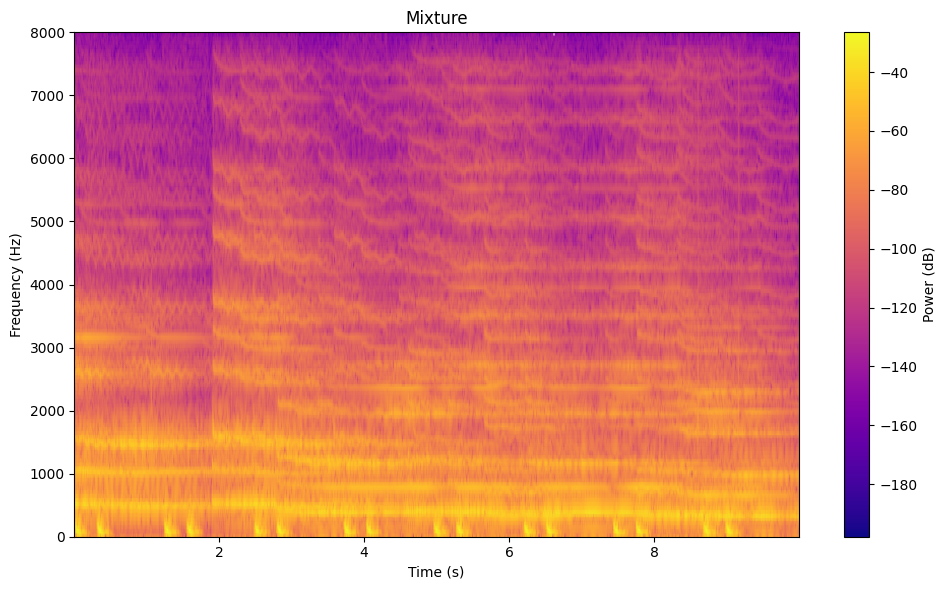

/tmp/ipykernel_622460/2839899522.py:33: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap = 'plasma',


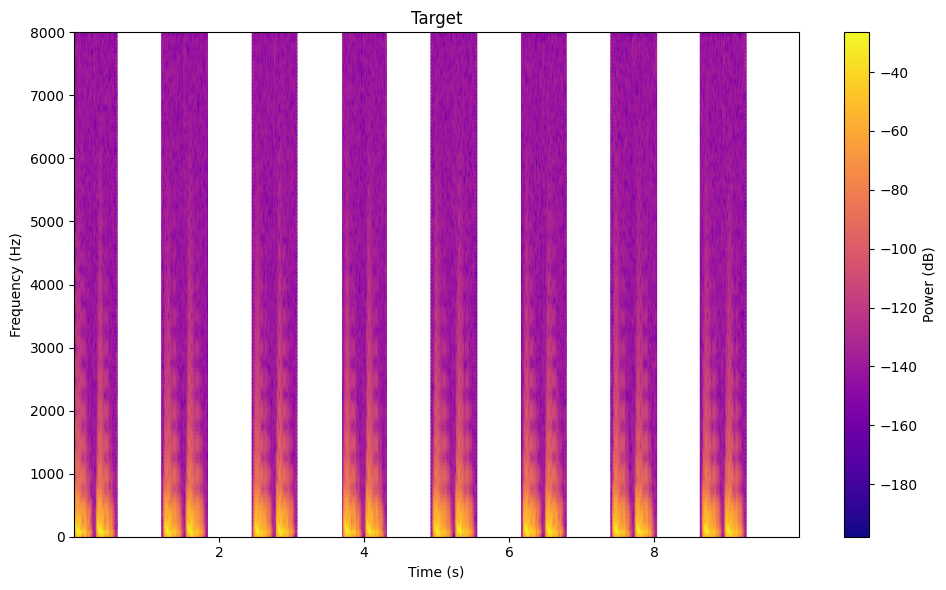

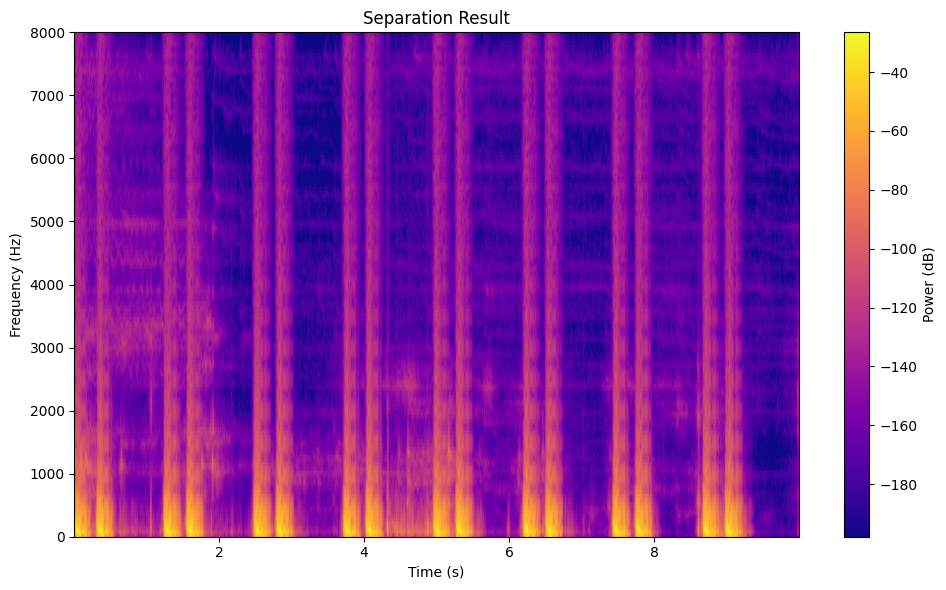

In [ ]:
# 
plot_spectrograms(mixture, source, sep_segment, sampling_rate, 'best_val_sdr')

In [ ]:
# top 1: "Someone is shoveling something, making a clinking sound."
df_results.sort_values(by = 'sdri', ascending=False)

source_path  \
763   lass_validation/700237_10996917-hq.wav   
1442   lass_validation/707622_1015240-hq.wav   
1995   lass_validation/702285_5828667-hq.wav   
2717  lass_validation/688735_10403690-hq.wav   
1849   lass_validation/689566_7033180-hq.wav   
...                                      ...   
847    lass_validation/707833_8476788-hq.wav   
2941   lass_validation/692865_2250422-hq.wav   
1396  lass_validation/708392_10996917-hq.wav   
796    lass_validation/686993_4949349-hq.wav   
2324  lass_validation/695941_15107438-hq.wav   

                                  noise_path  \
763    lass_validation/704937_5828667-hq.wav   
1442  lass_validation/688735_10403690-hq.wav   
1995  lass_validation/682322_10938187-hq.wav   
2717   lass_validation/687039_2448533-hq.wav   
1849  lass_validation/699943_10996917-hq.wav   
...                                      ...   
847    lass_validation/704778_2648888-hq.wav   
2941  lass_validation/706337_11918850-hq.wav   
1396    lass_validation/699477_710743-hq.wav   
796   lass_validation/714005_11379395-hq.wav   
2324  lass_validation/684377_12881682-hq.wav   

                                                                                 input_path  \
763    lass_validation_output/('700237_10996917-hq.wav', '704937_5828667-hq.wav')_input.wav   
1442   lass_validation_output/('707622_1015240-hq.wav', '688735_10403690-hq.wav')_input.wav   
1995   lass_validation_output/('702285_5828667-hq.wav', '682322_10938187-hq.wav')_input.wav   
2717   lass_validation_output/('688735_10403690-hq.wav', '687039_2448533-hq.wav')_input.wav   
1849   lass_validation_output/('689566_7033180-hq.wav', '699943_10996917-hq.wav')_input.wav   
...                                                                                     ...   
847     lass_validation_output/('707833_8476788-hq.wav', '704778_2648888-hq.wav')_input.wav   
2941   lass_validation_output/('692865_2250422-hq.wav', '706337_11918850-hq.wav')_input.wav   
1396    lass_validation_output/('708392_10996917-hq.wav', '699477_710743-hq.wav')_input.wav   
796    lass_validation_output/('686993_4949349-hq.wav', '714005_11379395-hq.wav')_input.wav   
2324  lass_validation_output/('695941_15107438-hq.wav', '684377_12881682-hq.wav')_input.wav   

                                                                                 output_path  \
763    lass_validation_output/('700237_10996917-hq.wav', '704937_5828667-hq.wav')_output.wav   
1442   lass_validation_output/('707622_1015240-hq.wav', '688735_10403690-hq.wav')_output.wav   
1995   lass_validation_output/('702285_5828667-hq.wav', '682322_10938187-hq.wav')_output.wav   
2717   lass_validation_output/('688735_10403690-hq.wav', '687039_2448533-hq.wav')_output.wav   
1849   lass_validation_output/('689566_7033180-hq.wav', '699943_10996917-hq.wav')_output.wav   
...                                                                                      ...   
847     lass_validation_output/('707833_8476788-hq.wav', '704778_2648888-hq.wav')_output.wav   
2941   lass_validation_output/('692865_2250422-hq.wav', '706337_11918850-hq.wav')_output.wav   
1396    lass_validation_output/('708392_10996917-hq.wav', '699477_710743-hq.wav')_output.wav   
796    lass_validation_output/('686993_4949349-hq.wav', '714005_11379395-hq.wav')_output.wav   
2324  lass_validation_output/('695941_15107438-hq.wav', '684377_12881682-hq.wav')_output.wav   

      input_similarity  output_similarity      sisdr       sdri        sdr  
763           0.334947           0.408520  25.806684  37.802962  25.802960  
1442          0.188431           0.341665  23.284783  35.263693  23.263693  
1995          0.211980           0.417818  21.935658  34.941967  21.941967  
2717          0.294499           0.523779  34.953394  32.872442  34.872441  
1849          0.257674           0.434647  22.510204  31.495653  22.495652  
...                ...                ...        ...        ...        ...  
847           0.365916           0.227513  -5.

In [ ]:
source_path = df_results.sort_values(by = 'sdri', ascending=False).iloc[0].source_path
mixture_path = df_results.sort_values(by = 'sdri', ascending=False).iloc[0].input_path
sep_path = df_results.sort_values(by = 'sdri', ascending=False).iloc[0].output_path

mixture, fs = librosa.load(mixture_path, sr=sampling_rate, mono=True)
source, fs = librosa.load(source_path, sr=sampling_rate, mono=True)
sep_segment, fs = librosa.load(sep_path, sr=sampling_rate, mono=True)

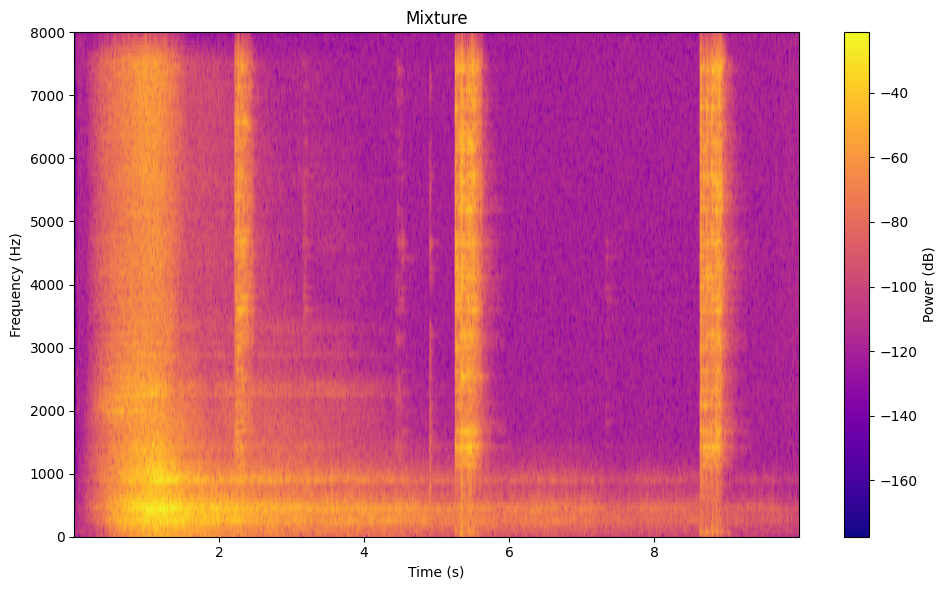

/tmp/ipykernel_622460/2839899522.py:33: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap = 'plasma',


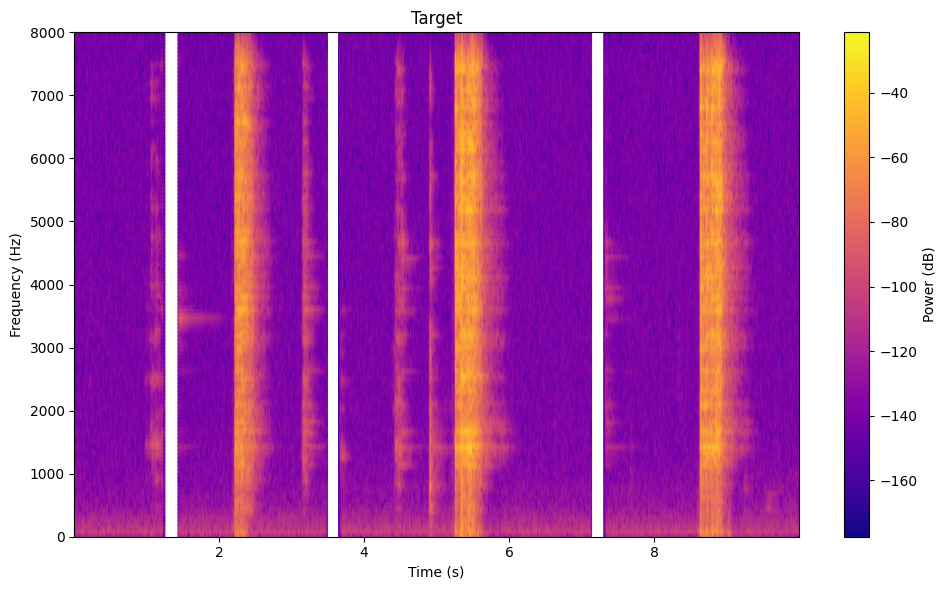

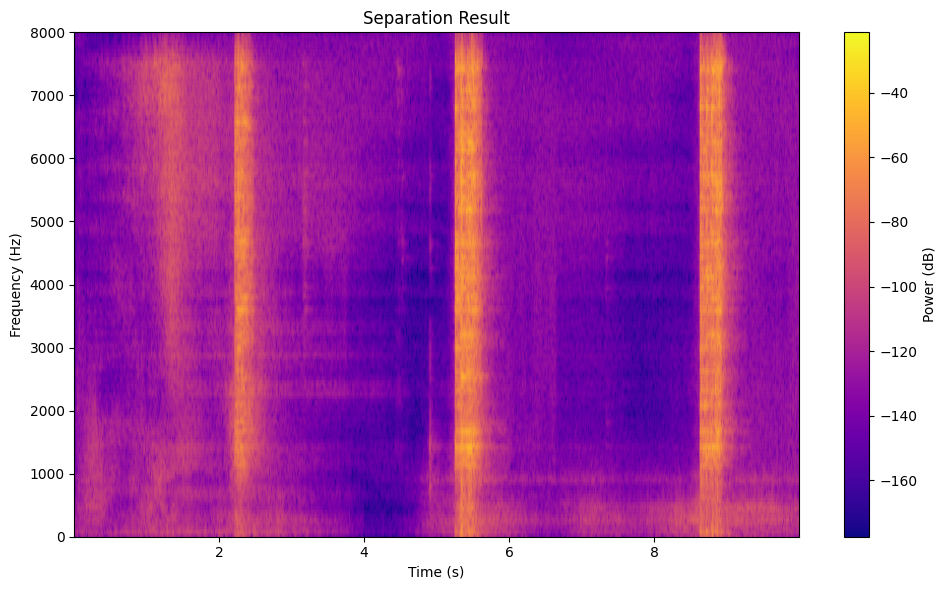

In [51]:
plot_spectrograms(mixture, source, sep_segment, sampling_rate, 'best_val_sdri')

In [71]:
df_results.sort_values(by = 'sisdr', ascending=False)[:2]

source_path  \
2717  lass_validation/688735_10403690-hq.wav   
523   lass_validation/699186_15162327-hq.wav   

                                 noise_path  \
2717  lass_validation/687039_2448533-hq.wav   
523   lass_validation/713910_4725336-hq.wav   

                                             input_path  \
2717  lass_validation_output/('688735_10403690-hq.wa...   
523   lass_validation_output/('699186_15162327-hq.wa...   

                                            output_path  input_similarity  \
2717  lass_validation_output/('688735_10403690-hq.wa...            0.2945   
523   lass_validation_output/('699186_15162327-hq.wa...            0.3851   

      output_similarity      sisdr       sdri        sdr  
2717             0.5238  34.953394  32.872442  34.872441  
523              0.4645  31.692014  24.687647  31.687647

In [ ]:
source_path = df_results.sort_values(by = 'sisdr', ascending=False).iloc[0].source_path
mixture_path = df_results.sort_values(by = 'sisdr', ascending=False).iloc[0].input_path
sep_path = df_results.sort_values(by = 'sisdr', ascending=False).iloc[0].output_path

mixture, fs = librosa.load(mixture_path, sr=sampling_rate, mono=True)
source, fs = librosa.load(source_path, sr=sampling_rate, mono=True)
sep_segment, fs = librosa.load(sep_path, sr=sampling_rate, mono=True)

/tmp/ipykernel_622460/2839899522.py:14: RuntimeWarning: divide by zero encountered in log10
  source_cmesh = plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap = 'plasma')


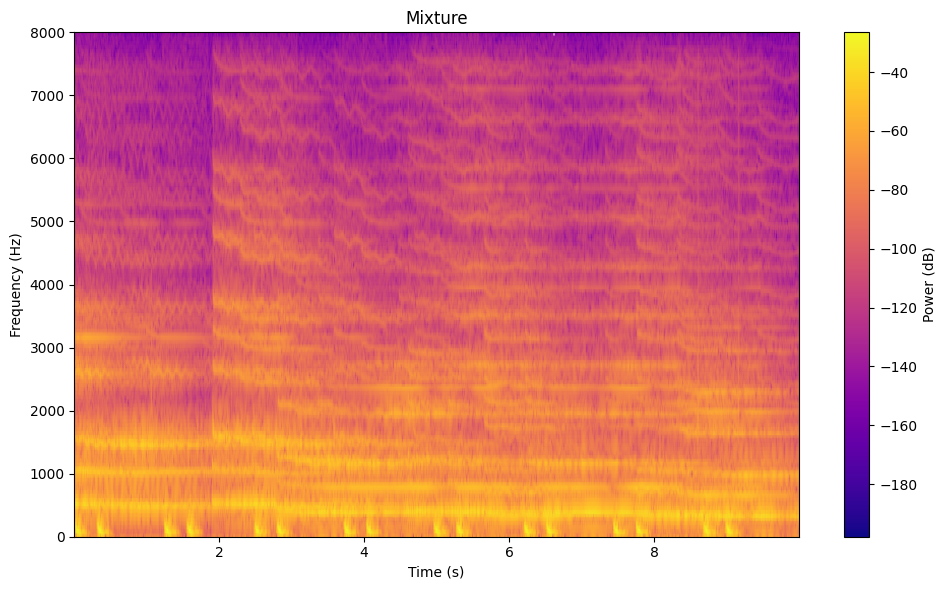

/tmp/ipykernel_622460/2839899522.py:33: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap = 'plasma',


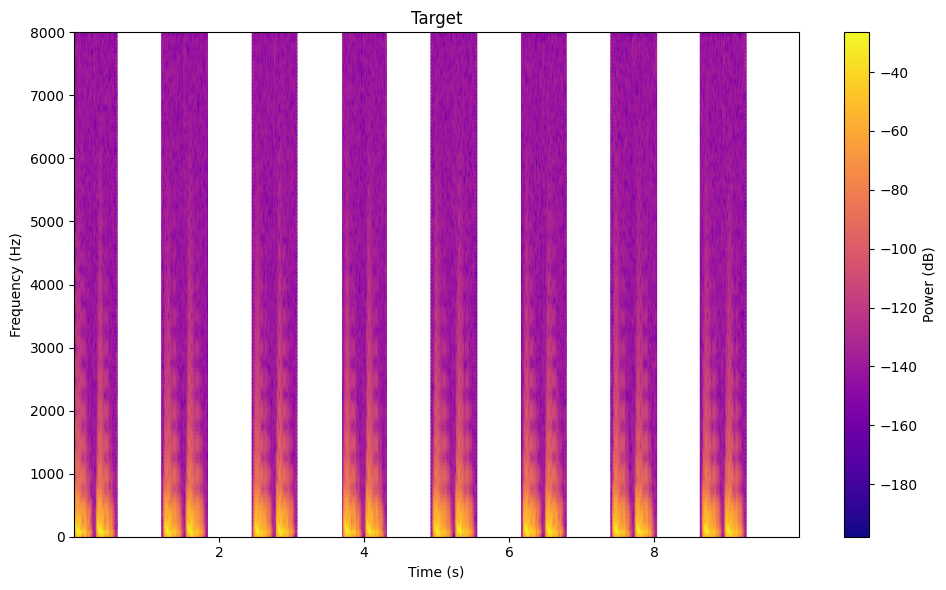

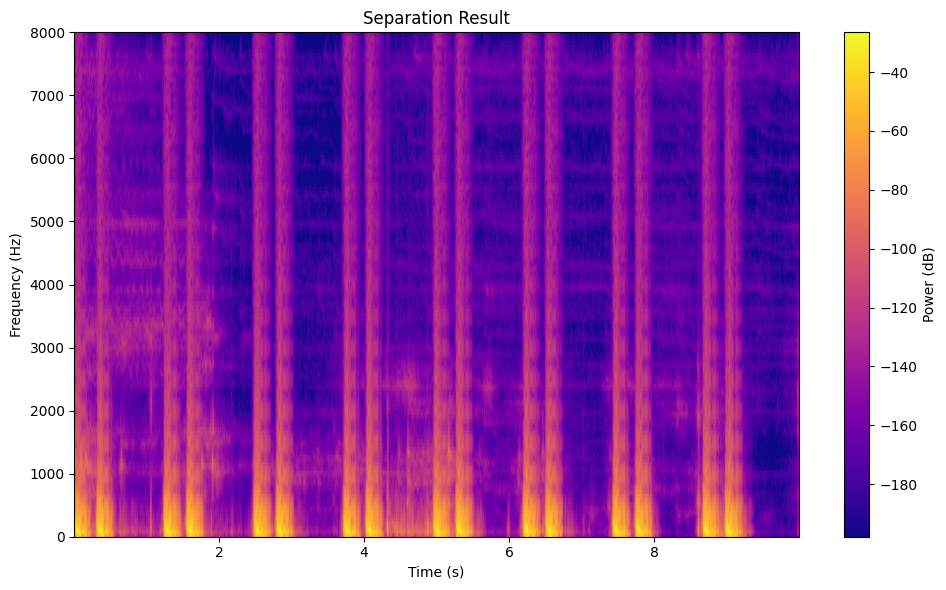

In [ ]:
# also the hearbeat
plot_spectrograms(mixture, source, sep_segment, sampling_rate, 'best_val_sisdr')

In [82]:
df_results.sort_values(by = 'input_similarity', ascending=False)[:2]

source_path  \
98  lass_validation/708900_15370659-hq.wav   
96  lass_validation/708900_15370659-hq.wav   

                                noise_path  \
98   lass_validation/699153_6196057-hq.wav   
96  lass_validation/703675_15220010-hq.wav   

                                                                               input_path  \
98   lass_validation_output/('708900_15370659-hq.wav', '699153_6196057-hq.wav')_input.wav   
96  lass_validation_output/('708900_15370659-hq.wav', '703675_15220010-hq.wav')_input.wav   

                                                                               output_path  \
98   lass_validation_output/('708900_15370659-hq.wav', '699153_6196057-hq.wav')_output.wav   
96  lass_validation_output/('708900_15370659-hq.wav', '703675_15220010-hq.wav')_output.wav   

    input_similarity  output_similarity     sisdr      sdri       sdr  \
98            0.6341             0.5851  7.020782  9.340067  7.340066   
96            0.6278             0.6943  9.118333  4.616636  9.616636   

    delta_similarity  
98           -0.0490  
96            0.0665

In [83]:
df_results.sort_values(by = 'delta_similarity', ascending=False)[:2]

source_path  \
986  lass_validation/694373_2578040-hq.wav   
333  lass_validation/685293_3797507-hq.wav   

                                noise_path  \
986  lass_validation/707282_1661766-hq.wav   
333  lass_validation/688742_6525386-hq.wav   

                                                                              input_path  \
986  lass_validation_output/('694373_2578040-hq.wav', '707282_1661766-hq.wav')_input.wav   
333  lass_validation_output/('685293_3797507-hq.wav', '688742_6525386-hq.wav')_input.wav   

                                                                              output_path  \
986  lass_validation_output/('694373_2578040-hq.wav', '707282_1661766-hq.wav')_output.wav   
333  lass_validation_output/('685293_3797507-hq.wav', '688742_6525386-hq.wav')_output.wav   

     input_similarity  output_similarity     sisdr       sdri       sdr  \
986           -0.0987             0.4580 -2.399163  10.019444  0.019445   
333           -0.0633             0.4847 -5.389640   8.980265  0.980264   

     delta_similarity  
986            0.5567  
333            0.5480

In [ ]:
source_path = df_results.sort_values(by = 'delta_similarity', ascending=False).iloc[0].source_path
mixture_path = df_results.sort_values(by = 'delta_similarity', ascending=False).iloc[0].input_path
sep_path = df_results.sort_values(by = 'delta_similarity', ascending=False).iloc[0].output_path

mixture, fs = librosa.load(mixture_path, sr=sampling_rate, mono=True)
source, fs = librosa.load(source_path, sr=sampling_rate, mono=True)
sep_segment, fs = librosa.load(sep_path, sr=sampling_rate, mono=True)

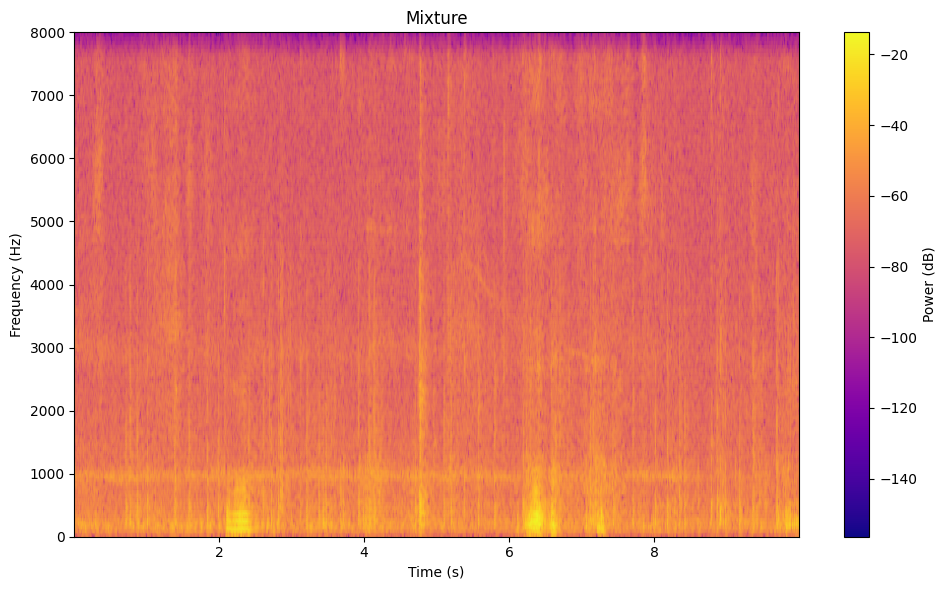

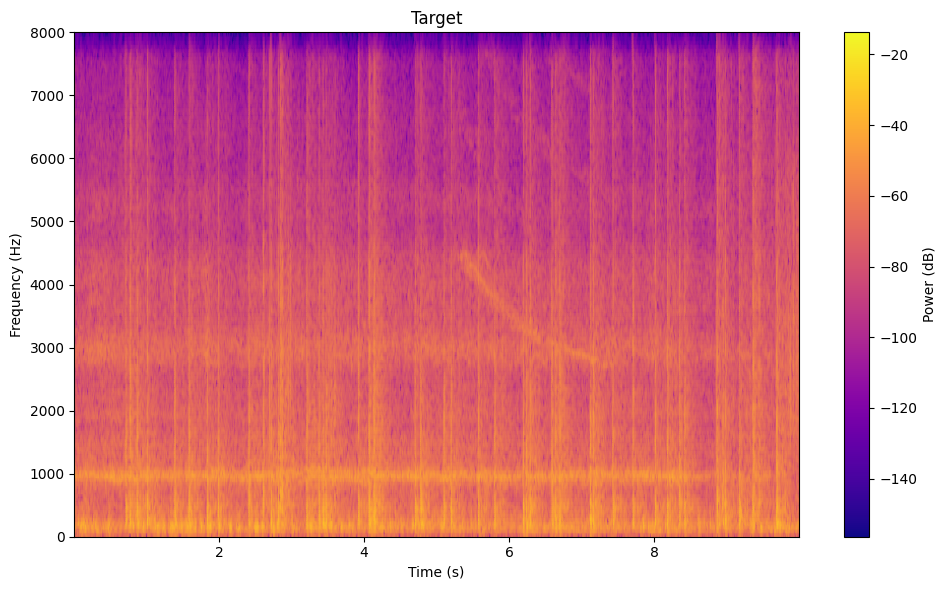

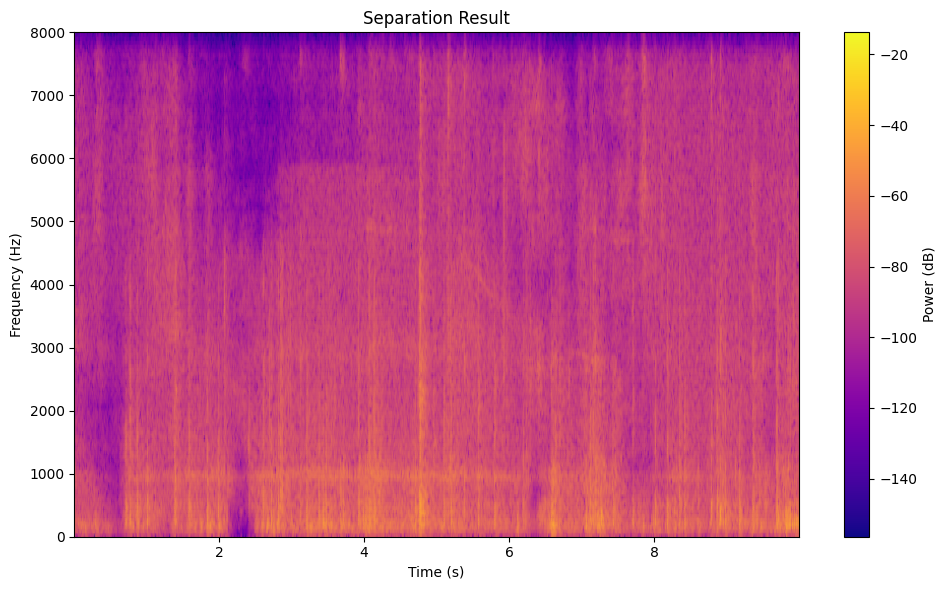

In [60]:
# Fireworks are shot into the air with swirling sounds and then they explode.
plot_spectrograms(mixture, source, sep_segment, sampling_rate, 'best_delta_similarity')